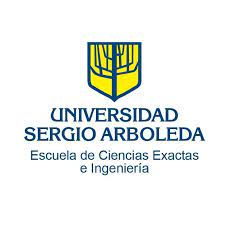

# **Programa de Ciencias de la Computación e Inteligencia Artificial**
---

### **Parcial #2**
> **Profesor**: John Jairo Corredor Franco

> **Autor**: Carlos Alberto Arévalo Martínez

> **Fecha**: 28 de Abril de 2022

> **Materia**: High Performance Computing 03 (HPC-03)

> **Tema**: Regresión Lineal

En este apartado, se realizará la comprobación y demostración de los resultados obtenidos en la parte escrita del parcial sobre Regresión Lineal.

**Indice**:


1.   Regresión Lineal

    1.1   Tipos de regresión lineal
    
2.   Método de los Mínimos Cuadrados Ordinarios (OLS)

    2.1   Función de costo

3. Método de Optimización del Gradiente Descendiente

    3.1   Cálculo de coeficientes

4. Métrica de Rendimiento $R^2$

5. Conclusión

6. Referencias



In [ ]:
# Se importan las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

## **1. Regresión Lineal**
La regresión lineal, según IBM (s.f.), "es una forma de análisis que se utiliza para predecir el valor de una variable según el valor de otra" y "ayuda a comprender y predecir el comportamiento de sistemas complejos" (MathWorks, s.f.).

La regresión lineal permite crear un modelo que describe la relación entre una variable dependiente $y$ ("target") como una función de una o más variables independientes $X_i$ ("features").

La ecuación general que corresponde a un modelo de regresión lineal es:

\begin{align}
Y = β_0 + \sum_{i=1}^n β_iX_i + ϵ_i
\end{align}

donde $β$ representa las estimaciones de parámetros lineales que se deben calcular y $ϵ$ representa los términos de error.

> ### **1.1 Tipos de regresión lineal**

Existen 4 tipos de regresión lineal: simple, múltiple, multivariante y múltiple multivariante.

Para el presente ejercicio, se utilizará el tipo de **regresión lineal simple**, que permite crear modelos que utilizan un único predictor. La ecuación general es:

\begin{align}
Y = β_0 + β_iX + ϵ_i
\end{align}

La anterior ecuación se puede demostrar de la siguiente forma:

\begin{align}
y = mX + b + ϵ_i
\end{align}

donde $b$ representa la constante del modelo (también llamada intercepto), que es el punto donde corta el eje de cordenadas $y$ cuando el valor de la variable $X$ es cero.

Por otra parte, $m$, representa la pendiente (inclinación) de la recta de regresión. Este coeficiente significa el incremento de unidades de la variable $y$ que se produce por cada incremento de una unidad de la variable $X$.

In [ ]:
# Se crea un diccionario con los valores de X e y
X = np.array([24, 21, 59, 17, 33, 40, 19, 45, 28, 34])
y = np.array([2400, 2700, 3250, 1600, 1800, 3600, 2100, 2600, 2000, 3500])

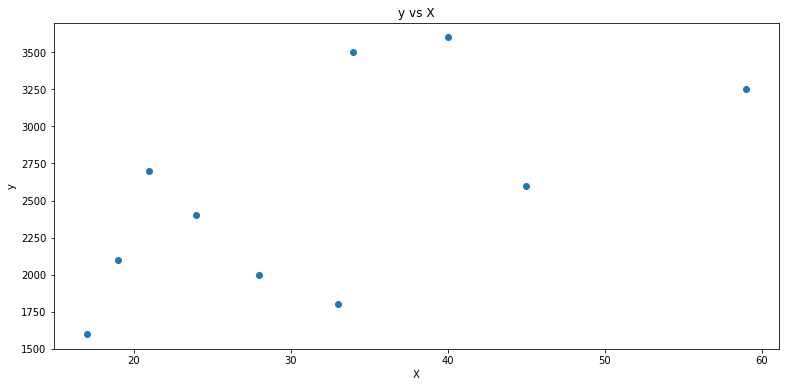

In [ ]:
plt.figure(figsize=(13, 6))
plt.scatter(X, y)
plt.title("y vs X")
plt.ylabel(r'y')
plt.xlabel('X')
plt.show()

## **2. Método de los Mínimos Cuadrados Ordinarios (OLS)**
> El método de los mínimos cuadrados ordinarios se utiliza para calcular la recta de regresión lineal que minimiza los residuos.

El componente estocástico de la ecuación, $ϵ_i$, representa el error en la estimación; la diferencia entre el valor real de $y$ en la nube de puntos y el valor estimado, representado como $\hat{y}$. Se puede representar matemáticamente como:

\begin{align}
e_i = y_i - \hat{y_i}
\end{align}

Los valores de las variables $X$ e $y$ ya se encuentran en la nube de puntos para la que se quiere calcular la recta. Lo que varía en la ecuación de la recta son los coeficientes del modelo, $b$ y $m$, aquellos con los se espera que el valor de la suma de residuos sea el menor posible.

Partiendo de la ecuación anterior de cada residuo, se puede representar la suma de residuos de la siguiente forma, donde $n$ es el número de pares de valores de $X$ e $y$ que se dispone:

\begin{align}
\sum_{i=1}^n e_i = \sum_{i=1}^n y_i - \hat{y_i}
\end{align}

El resultado de la diferencia de la fórmula anterior puede arrojar valores tanto positivos como negativos. Por este motivo, se deben calcular estas diferencias elevadas al cuadrado, según la siguiente fórmula:

\begin{align}
\sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y_i})^2
\end{align}

Según la fórmula anterior, definimos el error cuadrático como $Se$:

\begin{align}
Se = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y_i})^2
\end{align}

> ### **2.1 Función de costo**

Para calcular los coeficientes de la recta de regresión se debe sustituir el valor estimado $\hat{y}$, por los términos de la ecuación de la recta de regresión, y así encontrar los valores de $b$ y $m$ que minimicen la **función de costo**:

\begin{align}
Se = \sum_{i=1}^n (y_i - \hat{y_i})^2 = \sum_{i=1}^n (y_i - (mX_i + b))^2
\end{align}

La anterior fórmula se puede resolver como:

\begin{align}
Se = \sum_{i=1}^n (y_i - mX_i - b)^2
\end{align}

Al realizar la sumatoria de la anterior fórmula, la **función de costo** se puede simplificar en:

\begin{align}
Se = n\bar{y^2} - 2mn\bar{X}y - 2bn\bar{y} + m^2n\bar{X^2} + 2mbn\bar{X} + nb^2
\end{align}

## **3. Método de Optimización del Gradiente Descendiente**
> El Gradiente Descendiente es un algoritmo de optimización que permite determinar el mínimo de una función matemática. El gradiente es sinónimo de pendiente o inclinación, y matemáticamente recibe el nombre de derivada.

Para minimizar la función de costo, se procede a utilizar el método de optimización del gradiente descendiente, que permite encontrar el mejor valor para los coeficientes $m$ y $b$. Con base en esto, se igualan a cero las derivadas parciales con respecto a $m$ y respecto a $b$, de la siguiente manera:

\begin{align}
\frac{\partial{Se}}{\partial{m}} = 0
\end{align}

\begin{align}
\frac{\partial{Se}}{\partial{b}} = 0
\end{align}

> ### **3.1 Cálculo de coeficientes**

Al despejar $m$ y $b$ de las derivadas parciales, se obtienen las siguientes ecuaciones para hallar sus valores:

\begin{align}
m = \frac{\bar{Xy} - \bar{X} \bar{y}}{\bar{X^2} - (\bar{X})^2}
\end{align}

\begin{align}
b = \bar{y} - m\bar{X}
\end{align}

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [ ]:
# Se realiza el cálculo de los coeficientes
m = reg.coef_ # pendiente
b = reg.intercept_ # punto de corte

print(f"Pendiente = {m[0][0]}\n"\
      f"Punto de corte = {b[0]}")

Pendiente = 32.61843790012804
Punto de corte = 1511.2099871959026


In [ ]:
line = np.array([m*X + b])

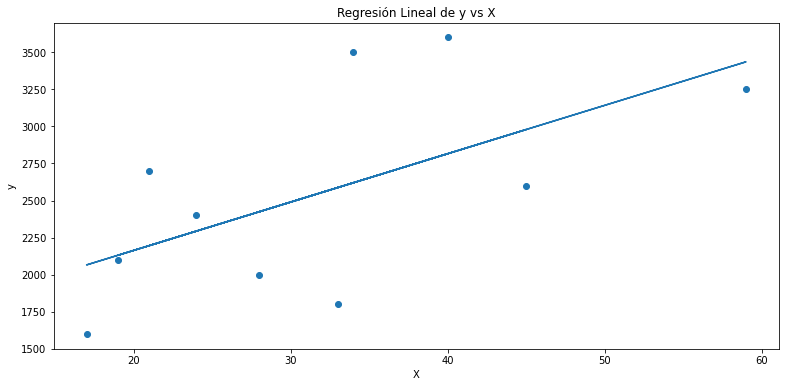

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot(X, line[0][0])
plt.scatter(X, y)
plt.title("Regresión Lineal de y vs X")
plt.ylabel(r'y')
plt.xlabel('X')
plt.show()

In [ ]:
# Predicciones
y_hat = reg.predict(X.reshape(-1, 1)) #y_predict
print(f"Predicciones:\n")
for idx, val in enumerate(X):
    print(f"f({val}) = {y_hat[idx][0]:.3f}")

Predicciones:

f(24) = 2294.052
f(21) = 2196.197
f(59) = 3435.698
f(17) = 2065.723
f(33) = 2587.618
f(40) = 2815.948
f(19) = 2130.960
f(45) = 2979.040
f(28) = 2424.526
f(34) = 2620.237


## **4. Métrica de Rendimiento $R^2$**
$R^2$, el coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. El mejor resultado posible es 1.0, y ocurre cuando la predicción coincide con los valores de la variable objetivo. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos:

\begin{align}
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}

Para utilizar la métrica r2_score se debe realizar primero los cálculos de $\hat{y}$

In [ ]:
# Se convierte la matriz en vector para realizar los cálculos
y_hat = y_hat.flatten()

In [ ]:
# Se utiliza la ecuación de r2
r2 = 1 - (((y-y_hat)**2).sum()/((y-y.mean())**2).sum())
print(f"Métrica de rendimiento función R2 {r2}")

Métrica de rendimiento función R2 0.3683105792036174


In [ ]:
# Se utiliza la métrica de rendimiento r2_score
r2 = r2_score(y, y_hat)
print(f"Métrica de rendimiento SK (r2_score) {r2}")

Métrica de rendimiento SK (r2_score) 0.3683105792036174


O se puede utilizar directamente la métrica mediante la función score() del modelo de regresión lineal

In [ ]:
# Se utiliza la métrica de rendimiento r2_score de lal modelo LR
lr_score = reg.score(X.reshape(-1, 1), y.reshape(-1, 1))
print(f"Métrica de rendimiento SK (r2_score de linear regression) {lr_score}")

Métrica de rendimiento SK (r2_score de linear regression) 0.3683105792036174


## **5. Conclusión**
La línea de regresión encontrada para este ejercicio no fue la mejor, la métrica de rendimiento demuestra solo el 36.83% de efectividad.

Según lo anterior, para mejorar su efectividad se recomienda aplicar el método de optimización del Gradiente Descendiente con varias iteraciones y una tasa de aprendizaje, para así, minimizar la función de costo, encontrando los mejores coeficientes $m$ y $b$, pendiente y punto de corte, respectivamente.

## **6. Referencias**
> IBM. (s.f.). Regresión lineal. Obtenido de IBM: https://www.ibm.com/co-es/analytics/learn/linear-regression

> The MathWorks, Inc. (s.f.). ¿Qué es la regresión lineal? Obtenido de MathWorks: https://la.mathworks.com/discovery/linear-regression.html

> Molina, M. (17 de 6 de 2020). La distancia más corta. El método de los mínimos cuadrados. Obtenido de Anestesiar: https://anestesiar.org/2020/la-distancia-mas-corta-el-metodo-de-los-minimos-cuadrados/

> Sotaquirá, M. (2 de 7 de 2018). ¿Qué es el Gradiente Descendente? Obtenido de CodificandoBits: https://www.codificandobits.com/blog/el-gradiente-descendente/

> InteractiveChaos. (s.f.). R2. Obtenido de InteractiveChaos: https://interactivechaos.com/es/manual/tutorial-de-machine-learning/r2
